# Introduction

## necessary Hardware

   GPU is important for neural network and deep learning and You need the Appropriate system.

   Currently, Nvidia is the best brand.

   for package tensorflow you need GPU ,comput capability 3 and uper (new Version of package tensorflow ,GPU ,comput capability    3.5 and uper)

   Specifications of GPU:

   1.Memory size: 6 GB RAM

   2.Power processor

   3.Bandwidth: 128 bit and uper , DDR5
   ***
   4.to have TensorCore

   https://deeplearning.ir/کدام-کارت-گرافیک-برای-یادگیری-عمیق-منا/

## if you don't have  necessary Hardware

  Some of the services you can use are:
  
  1.Amazon Web Service
  
  2.Microsoft Azure
  
  3.Google colab
  
  And....
  
  

you can go to http://deeplearning.ir/منابع-یادگیری-عمیق-منابع-deep-learning/ and Learn how to use this google colab service

## tensorflow

please go to http://deeplearning.ir and check Suitable version to your system

pip install tensorflow-gpu

conda install tensorflow-gpu

pip install tensorflow

pip install upgrade ......

In [1]:
import tensorflow as tf

Error:ModuleNotFoundError ----> maybe you'r GPU not Support comput capability 3 and uper

###  keras

pip install keras

# Import necessary package

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector

# Prediction with neural networks

## Data set

In [2]:
insurance = pd.read_csv("E:\دروس ارشد\یادگیری آماری\پروژه\insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance.shape # (rows, columns)

(1338, 7)

In [4]:
input_shape = [6]

## A single Neuron

 Define a linear model

In [5]:
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=1, input_shape=input_shape)
])

Look at the weights

In [6]:
w, b = model.weights

print("Weights\n{}\n\nBias\n{}".format(w, b))

Weights
<tf.Variable 'dense/kernel:0' shape=(6, 1) dtype=float32, numpy=
array([[ 0.8536961 ],
       [-0.5982053 ],
       [ 0.20958924],
       [-0.18026644],
       [-0.26846397],
       [-0.7476952 ]], dtype=float32)>

Bias
<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


## Deep Neural Networks

Define a Model with Hidden Layers

### Activation Layers

In [7]:
model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=input_shape),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=1),
])

In [8]:
model = keras.Sequential([
    layers.Dense(32, input_shape=input_shape),
    layers.Activation('relu'),
    layers.Dense(32),
    layers.Activation('relu'),
    layers.Dense(1),
])

### Pre-processing on data

In [9]:
X = insurance.copy()
# Remove target
y = X.pop('charges')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y)  # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [11]


### Add Loss and Optimizer 

In [10]:
model = keras.Sequential([
    layers.Dense(50, activation='relu', input_shape=input_shape),
    layers.Dense(50, activation='relu'),    
    layers.Dense(25, activation='relu'),
    layers.Dense(1),
])

#### Stochastic Gradient Descent

In [11]:
model.compile(optimizer='SGD',loss='mse',)

Train Model

In [12]:
history = model.fit(
    X, y,
    batch_size=50,
    epochs=100,
)

Epoch 1/100
27/27 [==============================] - 0s 1ms/step - loss: 14.3148
Epoch 2/100
27/27 [==============================] - 0s 555us/step - loss: 0.4314
Epoch 3/100
27/27 [==============================] - 0s 614us/step - loss: 0.4093
Epoch 4/100
27/27 [==============================] - 0s 726us/step - loss: 0.2736
Epoch 5/100
27/27 [==============================] - 0s 652us/step - loss: 0.2615
Epoch 6/100
27/27 [==============================] - 0s 614us/step - loss: 0.2921
Epoch 7/100
27/27 [==============================] - 0s 610us/step - loss: 0.1909
Epoch 8/100
27/27 [==============================] - 0s 678us/step - loss: 0.2991
Epoch 9/100
27/27 [==============================] - 0s 574us/step - loss: 0.2523
Epoch 10/100
27/27 [==============================] - 0s 603us/step - loss: 0.2075
Epoch 11/100
27/27 [==============================] - 0s 604us/step - loss: 0.4068
Epoch 12/100
27/27 [==============================] - 0s 612us/step - loss: 0.1843
Epoch 13/100
2

<AxesSubplot:>

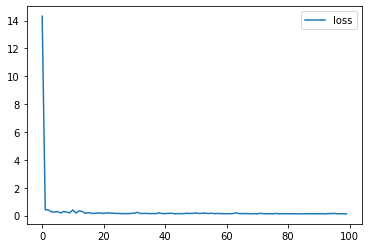

In [13]:
loss = pd.DataFrame(history.history)
loss.plot()

## Evaluate Training
| `learning_rate` | `batch_size` | `num_examples` |
|-----------------|--------------|----------------|
| 0.05            | 32           | 256            |
| 0.05            | 2            | 256            |
| 0.05            | 128          | 256            |
| 0.02            | 32           | 256            |
| 0.2             | 32           | 256            |
| 1.0             | 32           | 256            |
| 0.9             | 4096         | 8192           |
| 0.99            | 4096         | 8192           |



learning_rate = 0.99

batch_size =128

num_examples = 256

In [2]:
# Setup plotting
import matplotlib.pyplot as plt
from learntools import animate_sgd
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')
learning_rate = 0.99
batch_size =128
num_examples = 256

animate_sgd(
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_examples=num_examples,
    # You can also change these, if you like
    steps=50, # total training steps (batches seen)
    true_w=3.0, # the slope of the data
    true_b=2.0, # the bias of the data
)

learning_rate = 0.05

batch_size =10

num_examples = 256

In [3]:
# Setup plotting
import matplotlib.pyplot as plt
from learntools import animate_sgd
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')
learning_rate = 0.05
batch_size =10
num_examples = 256

animate_sgd(
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_examples=num_examples,
    # You can also change these, if you like
    steps=50, # total training steps (batches seen)
    true_w=3.0, # the slope of the data
    true_b=2.0, # the bias of the data
)

learning_rate = 0.05

batch_size =128

num_examples = 256

In [4]:
# Setup plotting
import matplotlib.pyplot as plt
from learntools import animate_sgd
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')
learning_rate = 0.05
batch_size =128
num_examples = 256

animate_sgd(
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_examples=num_examples,
    # You can also change these, if you like
    steps=50, # total training steps (batches seen)
    true_w=3.0, # the slope of the data
    true_b=2.0, # the bias of the data
)

## Overfitting and Underfitting

In [14]:
Male = pd.get_dummies(insurance['sex'], drop_first=True)
insurance = pd.concat([insurance, Male], axis=1 )

Smoker = pd.get_dummies(insurance['smoker'], drop_first=True)
insurance = pd.concat([insurance, Smoker], axis=1 )

insurance = insurance.rename(columns={'yes':'Smoker'})

region = pd.get_dummies(insurance['region'])
insurance = pd.concat([insurance, region], axis=1 )

#insurance.head()

In [15]:
insurance.drop(['sex', 'region', 'smoker', 'southwest'], axis=1, inplace=True)
#insurance.head()

In [16]:
from IPython.display import display


# Create training and validation splits
df_train = insurance.sample(frac=0.7, random_state=0)
df_valid = insurance.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('charges', axis=1)
X_valid = df_valid.drop('charges', axis=1)
y_train = df_train['charges']
y_valid = df_valid['charges']

,age,bmi,children,charges,male,Smoker,northeast,northwest,southeast
578,52,30.200,1,9724.53000,1,0,0,0,0
610,47,29.370,1,8547.69130,0,0,0,0,1
569,48,40.565,2,45702.02235,1,1,0,1,0
1034,61,38.380,0,12950.07120,1,0,0,1,0


In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_validate = scaler.transform(X_test)

In [19]:
early_stopping =EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
    monitor='val_loss', mode= 'min', verbose= 0,
    
)


In [20]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(1),
])
model.compile(
    optimizer='SGD',
    loss='mse',
)

In [21]:
from tensorflow.keras import callbacks

Minimum Validation Loss: 2.5044


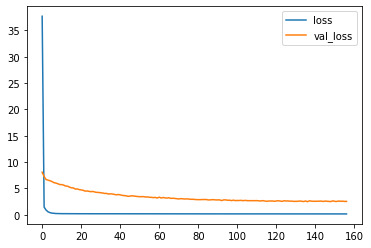

In [22]:
model.fit(
    x=X_train, y=y_train, 
    epochs = 200, 
    validation_data=(X_test, y_test), 
    batch_size=128, 
    callbacks=[early_stopping],
    verbose= 0,
)

loss = pd.DataFrame(model.history.history)
loss.plot()
print("Minimum Validation Loss: {:0.4f}".format(loss['val_loss'].min()));

<AxesSubplot:>

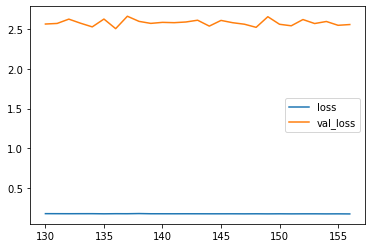

In [24]:
loss.loc[130:,['loss','val_loss']].plot()

## Dropout 

In [25]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dropout(0.3),
    layers.Dense(1),
])

Minimum Validation Loss: 2.0750


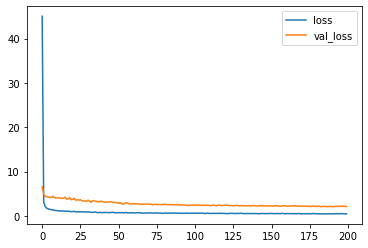

In [26]:
model.compile(
    optimizer='SGD',
    loss='mse',
)
model.fit(
    x=X_train, y=y_train, 
    epochs = 200, 
    validation_data=(X_test, y_test), 
    batch_size=128, 
    callbacks=[early_stopping],
    verbose= 0,
)

loss = pd.DataFrame(model.history.history)
loss.plot()
print("Minimum Validation Loss: {:0.4f}".format(loss['val_loss'].min()));

## Batch Normalization

In [27]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1),
])
model.compile(
    optimizer='SGD', 
    loss='mse',
    
)

Minimum Validation Loss: 0.4565


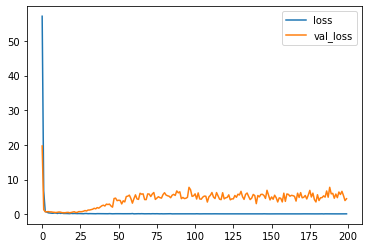

In [28]:
model.fit(
    x=X_train, y=y_train, 
    epochs = 200, 
    validation_data=(X_test, y_test), 
    batch_size=128, 
    verbose= 0,
)

loss = pd.DataFrame(model.history.history)
loss.plot()
print("Minimum Validation Loss: {:0.4f}".format(loss['val_loss'].min()));

## prediction

In [29]:
y_predicted = model.predict(X_test)

In [32]:
y_predicted[:5]

array([[ 8.372568],
       [ 9.038972],
       [10.817824],
       [ 9.847948],
       [ 9.58729 ]], dtype=float32)

In [33]:
y_test[:5]

861     8.875020
823     9.014229
890    10.286400
607    10.153420
674    10.740756
Name: charges, dtype: float64

# Digits classification

## Data set 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
import pandas as pd 
import numpy as np

In [2]:
digits = pd.read_csv(r"C:\Users\Sharif\Downloads\train.csv\train.csv")
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [3]:
test=pd.read_csv(r"C:\Users\Sharif\Downloads\test.csv\test.csv")
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Pre-processing on data

In [4]:
X=digits.drop(['label'],axis=1)
Y=digits.label
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, Y, stratify=Y, train_size=0.75)
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
11190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train.shape

(31500, 784)

In [6]:
X_valid.shape

(10500, 784)

In [7]:
X_train.index = range(31500)
y_train.index = range(31500)
X_valid.index = range(10500)
y_valid.index = range(10500)

In [8]:
X_train=X_train/255
X_valid=X_valid/255

In [9]:
input_shape=[784]

##  accuracy

accuracy= number_correct / total

## one layer model 

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=input_shape, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
985/985 [==============================] - 2s 1ms/step - loss: 0.9782 - accuracy: 0.7697
Epoch 2/50
985/985 [==============================] - 1s 1ms/step - loss: 0.5392 - accuracy: 0.8664
Epoch 3/50
985/985 [==============================] - 1s 1ms/step - loss: 0.4594 - accuracy: 0.8804
Epoch 4/50
985/985 [==============================] - 1s 1ms/step - loss: 0.4206 - accuracy: 0.8877
Epoch 5/50
985/985 [==============================] - 1s 1ms/step - loss: 0.3964 - accuracy: 0.8930
Epoch 6/50
985/985 [==============================] - 1s 1ms/step - loss: 0.3793 - accuracy: 0.8978
Epoch 7/50
985/985 [==============================] - 1s 1ms/step - loss: 0.3667 - accuracy: 0.8992
Epoch 8/50
985/985 [==============================] - 1s 1ms/step - loss: 0.3567 - accuracy: 0.9021
Epoch 9/50
985/985 [==============================] - 1s 1ms/step - loss: 0.3484 - accuracy: 0.9043
Epoch 10/50
985/985 [==============================] - 1s 1ms/step - loss: 0.3415 - accuracy: 0.9055

<AxesSubplot:>

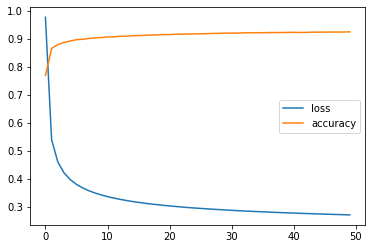

In [11]:
loss = pd.DataFrame(model.history.history)
loss.plot()

## Multilayer model

In [12]:
model =keras.Sequential([
    keras.layers.BatchNormalization(input_shape =input_shape),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='sigmoid')
    ])

### Add Optimizer, Loss, and Metric

In [13]:
model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

Epoch 1/200
62/62 [==============================] - 3s 26ms/step - loss: 1.4659 - accuracy: 0.5456 - val_loss: 1.3981 - val_accuracy: 0.7570
Epoch 2/200
62/62 [==============================] - 1s 19ms/step - loss: 0.6950 - accuracy: 0.7885 - val_loss: 0.9147 - val_accuracy: 0.8268
Epoch 3/200
62/62 [==============================] - 1s 19ms/step - loss: 0.5498 - accuracy: 0.8338 - val_loss: 0.6262 - val_accuracy: 0.8618
Epoch 4/200
62/62 [==============================] - 1s 18ms/step - loss: 0.4747 - accuracy: 0.8582 - val_loss: 0.4777 - val_accuracy: 0.8819
Epoch 5/200
62/62 [==============================] - 1s 18ms/step - loss: 0.4337 - accuracy: 0.8709 - val_loss: 0.4003 - val_accuracy: 0.8943
Epoch 6/200
62/62 [==============================] - 1s 19ms/step - loss: 0.4034 - accuracy: 0.8815 - val_loss: 0.3569 - val_accuracy: 0.9013
Epoch 7/200
62/62 [==============================] - 1s 19ms/step - loss: 0.3746 - accuracy: 0.8900 - val_loss: 0.3298 - val_accuracy: 0.9057
Epoch 

<AxesSubplot:title={'center':'Accuracy'}>

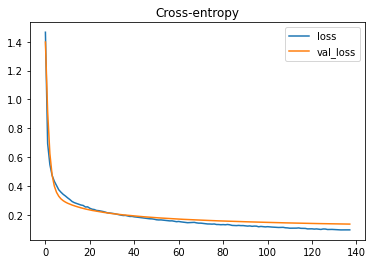

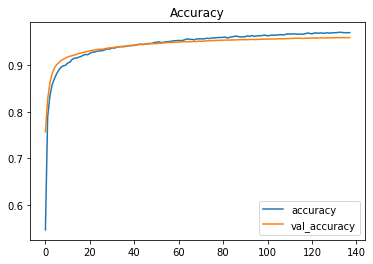

In [14]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
    monitor='val_loss', mode= 'min', verbose= 0,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

### Fit model in validation data

In [15]:
model.evaluate(X_valid, y_valid)

329/329 [==============================] - 1s 2ms/step - loss: 0.1377 - accuracy: 0.9598


[0.13765260577201843, 0.9598095417022705]

In [16]:
y_predicted = model.predict(X_valid)
y_predicted[0]

array([0.05096036, 0.99980426, 0.63946223, 0.19770396, 0.83052623,
       0.02076527, 0.22382191, 0.9340373 , 0.14992708, 0.31222102],
      dtype=float32)

In [17]:
np.argmax(y_predicted[0])

1

In [18]:
y_valid[0]

1

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [20]:
y_predicted_labels[:5]

[1, 5, 1, 9, 2]

In [21]:
y_valid[:5]

0    1
1    5
2    1
3    9
4    2
Name: label, dtype: int64

In [22]:
cm = tf.math.confusion_matrix(labels=y_valid,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[1015,    0,    2,    1,    2,    1,    3,    2,    5,    2],
       [   0, 1153,    5,    3,    1,    3,    2,    1,    3,    0],
       [   5,    7, 1006,    4,    4,    2,    4,    7,    3,    2],
       [   1,    5,   17, 1027,    0,    8,    1,   11,   15,    3],
       [   0,    5,    7,    0,  976,    0,    4,    0,    2,   24],
       [   2,    2,    3,   25,    4,  891,   10,    2,    4,    6],
       [   8,    1,    0,    0,    2,   13, 1008,    0,    2,    0],
       [   1,    3,    8,    4,    2,    0,    0, 1063,    0,   19],
       [   5,   13,    5,   10,    6,    7,    5,    2,  960,    3],
       [   4,    3,    3,   10,   15,    6,    0,   20,    7,  979]])>

###  prediction label of test data 
the test data don't have any labels

In [23]:
y_predicted = model.predict(test)

In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[2, 0, 2, 0, 2]